<div style="text-align: center">
<b><font size=6>ChEn 3603 Homework 10 Problem 2
    </font></b>
</div>

<div class="alert alert-block alert-danger">

&copy; 2020 This material is copyright protected. Distributing this material in any form without written permission from Professor Sutherland is prohibited and may result in academic discipline.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [2]:
# Load the Txy data
data = pd.read_csv('Txy.csv')
Teq = data['T'].values
xeq = data['x'].values
yeq = data['y'].values

In [3]:
zf = 0.55   # feed composition of benzene
zd = 0.80   # distillate composition
zb = 0.15   # bottoms composition

q    = 0.33 # q value for determining q-line
Rfac = 3    # Reflux ratio multiplying factor (R = Rfac * Rmin)

F = 65      # feed flow rate, kg/hr

# Convert the feed to a molar flow rate:
Mben = 12*6 + 1*6   # Benzene: C6H6
Mtol = 12*7 + 1*8   # Toluene: C7H8

Mfeed = zf*Mben + (1-zf)*Mtol   # feed mixture molecular weight

F = F / Mfeed  # Feed flow rate, kmol/hr

# Part 1 - composition at which the $q$-line intersects the equilibrium curve

We know that 
\begin{equation}
    \label{eq:equil}
    y=Kx
\end{equation}
and we also know the equation of the $q$-line:
\begin{equation}
    \label{eq:qline}
    y = \left(\frac{q}{q-1}\right) x - \frac{z_F}{q-1}
\end{equation}
and in this case we know that $q=\frac{L_{F}}{F}=0.67.$
Recall that one location on the $q$-line is the feed: $x=z_F$ and $y=z_F$.

We have tabulated equilibrium data.
Therefore, we can find $x$ that makes the difference between \eqref{eq:equil} and \eqref{eq:qline} small.

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


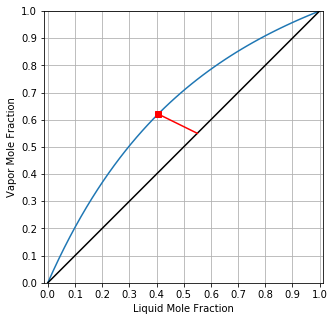

q-line intersects equilibrium at (0.406,0.621)


In [4]:
def target(x):
    y1 = np.interp(x,xeq,yeq)
    y2 = q/(q-1) * x - zf/(q-1)
    return abs(y1-y2)

result = fsolve( target, 0.5 )
x = result[0]
y = np.interp(x,xeq,yeq)

plt.figure(figsize=(5,5))

plt.plot(xeq,yeq)
plt.plot([0,1],[0,1],'k-')
plt.plot([zf,x],[zf,y],'r-')
plt.plot(x,y,'rs')
plt.grid()
plt.xlabel('Liquid Mole Fraction')
plt.ylabel('Vapor Mole Fraction')
plt.axis('equal')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
axes.set_xticks(np.arange(0, 1.01, 0.1))
axes.set_yticks(np.arange(0, 1.01, 0.1))
plt.show()

print('q-line intersects equilibrium at ({:.3f},{:.3f})'.format(x,y))

Note that you could also solve this graphically by reading off the composition where these lines intersect.

# Part 2 - Minimum Reflux Ratio

The minimum reflux ratio corresponds to a slope of the rectifying section operating line such that the line intersects the equilibrium curve at the same location as the $q$-line.

We know two points on this line: the $q$-line point from part 1 and the distillate composition from the problem statement.

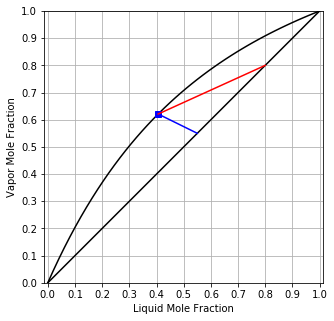

In [5]:
slope = ( zd - y ) / ( zd - x )


plt.figure(figsize=(5,5))

plt.plot(xeq,yeq,'k-')
plt.plot([0,1],[0,1],'k-')
plt.plot([zf,x],[zf,y],'b-')
plt.plot(x,y,'bs')
plt.plot( [x,zd],[y,zd],'r-')
plt.grid()
plt.xlabel('Liquid Mole Fraction')
plt.ylabel('Vapor Mole Fraction')
plt.axis('equal')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
axes.set_xticks(np.arange(0, 1.01, 0.1))
axes.set_yticks(np.arange(0, 1.01, 0.1))
plt.show()

We can thus determine the slope and then the reflux ratio:
$$
    R = \frac{ \frac{L}{V} }{ 1 - \frac{L}{V} }
$$

In [6]:
Rmin = slope / (1-slope)
print('Minimum reflux ratio: {:.1f}'.format(Rmin))

Minimum reflux ratio: 0.8


-----
# Part 3 - number of theoretical stages

From the previous part, we know $R_{\mathrm{min}}$ so now $R=3R_{\mathrm{min}}$ and 
$$
    \frac{L}{V} = \frac{R}{1+2R} = \frac{R_{\mathrm{min}}}{1+2R_{\mathrm{min}}}
$$

Given this information, we can draw in the rectifying section operating line on the _xy_-diagram as shown in the figure below.

In [2]:
R = Rfac * Rmin

# slope of rectifying line
rslope = R/(R+1)

# determine the point where the rectifying line intersects the q-line.
# First, get the x-value.  
if q==1:   # for q=1, we know the line is vertical, so zq=zf.
    xq = zf
else:
    # solve for the x-location by setting the rectifying operating line
    # equal to the q-line
    xq = ( zd/(R+1) + zf/(q-1) )/( q/(q-1) - R/(R+1) )

yq = R/(R+1)*xq + zd/(R+1)

# slope of stripping line:
sslope = (yq-zb)/(xq-zb)

# rectifying section operating line:
xr = [xq,zd]  # x-range
yr = [yq,zd]  # y-range

# stripping section operating line:
xs = [zb,xq]  # x-range
ys = [zb,yq]  # y-range

# set up the plot
plt.figure(figsize=(7,7))
plt.plot( [0,1],[0,1],'k-')
plt.plot( xeq,yeq,'k-' )
plt.plot( [zf,xq],[zf,yq],'b-' )
plt.plot( xs,ys,'rs-',xr,yr,'rs-' )

plt.grid()
plt.xlabel('Liquid Benzene Mole Fraction');
plt.ylabel('Vapor Benzene Mole Fraction');

# count off stages, starting from the top.
xop = zd
yop = zd

nstage = 0
feedStage = 0
while xop>zb:
    nstage += 1

    # calculate the equilibrium composition of this stage
    xstage = np.interp( yop, yeq, xeq )
    ystage = yop

    plt.plot([xop,xstage],[yop,ystage],'g-')

    # which operating line are we on?
    if xstage > xq:
        slope = rslope
        yop = slope*(xstage-zd)+zd
    else:
        if feedStage == 0:
            feedStage = nstage

        slope = sslope
        yop = max(xstage, slope*(xstage-xq)+yq )

    xop = xstage

    plt.plot( [xstage,xstage],[ystage,yop],'g-')
    plt.text( xstage-.03, ystage+.03, str(nstage) )

plt.axis('equal')
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,1])
axes.set_xticks(np.arange(0, 1.01, 0.1))
axes.set_yticks(np.arange(0, 1.01, 0.1))

plt.show()

NameError: name 'Rfac' is not defined

In [3]:
print('\nLocate the feed on stage {:d}'.format(feedStage))
print('\nAt R={:.1f} Rmin, {:d} stages are required'.format(Rfac,nstage))
print('\nThe bottoms composition is {:.2f}'.format(xop))

NameError: name 'feedStage' is not defined